# Prepairing

## inSTAR PLATINum

In [ ]:
#metrics
!pip install -q git+https://github.com/google-research/bleurt.git
!pip install -q bert_score
!pip install -q rouge-score

#hugging
!pip install -q transformers
!pip install -q datasets

#keras
!pip install -q --upgrade keras-nlp
!pip install -q --upgrade keras

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15

## config

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "torch"
import keras_nlp
import keras

import transformers

import numpy as np

import torch
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

## random

In [ ]:
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
keras.utils.set_random_seed(SEED)
transformers.set_seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

## models

In [ ]:
gpt2_types = list(keras_nlp.models.GPT2Backbone.presets.keys())
opt_types = list(keras_nlp.models.OPTBackbone.presets.keys())
print(gpt2_types)
print(opt_types)
GPT2 = gpt2_types[0]
OPT = opt_types[0]
PYTHIA = "EleutherAI/pythia-160m-deduped"
LLAMA = "JackFram/llama-160m"

['gpt2_base_en', 'gpt2_medium_en', 'gpt2_large_en', 'gpt2_extra_large_en', 'gpt2_base_en_cnn_dailymail']
['opt_125m_en', 'opt_1.3b_en', 'opt_2.7b_en', 'opt_6.7b_en']


## constraints

In [ ]:
DIR_CONSTRAINTS_PATH = '/content/drive/My Drive/Colab Notebooks/NLP_models_qa_testing/text-generation/constraints/'

# Datasets

In [ ]:
import datasets

## datasets

In [ ]:
SQUAD_V2 = "squad_v2"
SQL_CONTEXT = "b-mc2/sql-create-context"
ADVERSARIAL_QA = "adversarial_qa"

In [ ]:
squad2 = datasets.load_dataset(SQUAD_V2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [ ]:
sql = datasets.load_dataset(SQL_CONTEXT)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
adversarial_qa = datasets.load_dataset(ADVERSARIAL_QA, 'adversarialQA')

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
squad2['train'].to_pandas().loc[0:0]

,id,title,context,question,answers
0,56be85543aeaaa14008c9063,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,"{'text': ['in the late 1990s'], 'answer_start'..."


In [ ]:
sql['train'].to_pandas().loc[0:0]

,question,context,answer
0,How many heads of the departments are older th...,CREATE TABLE head (age INTEGER),SELECT COUNT(*) FROM head WHERE age > 56


In [ ]:
adversarial_qa['train'].to_pandas().loc[0:0]

,id,title,context,question,answers,metadata
0,7ba1e8f4261d3170fcf42e84a81dd749116fae95,Brain,Another approach to brain function is to exami...,What sare the benifts of the blood brain barrir?,"{'text': ['isolated from the bloodstream'], 'a...","{'split': 'train', 'model_in_the_loop': 'Combi..."


## tokenizers

In [ ]:
gpt2_tokenizer = keras_nlp.models.GPT2Tokenizer.from_preset(GPT2)

opt_tokenizer = keras_nlp.models.OPTTokenizer.from_preset(OPT)

pythia_tokenizer = transformers.AutoTokenizer.from_pretrained(
  PYTHIA,
  revision="step103000",
  cache_dir="./pythia-160m-deduped/step103000",
  padding_side='left',
  model_max_length=1024,
)

llama_tokenizer = transformers.AutoTokenizer.from_pretrained(
    LLAMA,
    cache_dir="./llama/160m",
    padding_side='left',
    model_max_length=1024,
)

INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/gpt2/keras/gpt2_base_en/2/download/tokenizer.json...
100%|██████████| 448/448 [00:00<00:00, 1.07MB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/gpt2/keras/gpt2_base_en/2/download/assets/tokenizer/merges.txt...
100%|██████████| 446k/446k [00:00<00:00, 1.25MB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/gpt2/keras/gpt2_base_en/2/download/assets/tokenizer/vocabulary.json...
100%|██████████| 0.99M/0.99M [00:00<00:00, 2.40MB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/opt/keras/opt_125m_en/2/download/tokenizer.json...
100%|██████████| 443/443 [00:00<00:00, 1.14MB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/opt/keras/opt_125m_en/2/download/assets/tokenizer/merges.txt...
100%|██████████| 446k/446k [00:00<00:00, 1.27MB/s]
INFO:kagglehub.clients:Down

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

## preprocess of data

In [ ]:
MAX_TOKENS = 128

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
def get_entire_dataset(dataset, names_arr):
  df_list = [dataset[name].to_pandas() for name in names_arr]
  return pd.concat(df_list)

In [ ]:
squad2 = get_entire_dataset(squad2, ['train','validation'])
sql = get_entire_dataset(sql, ['train'])
adversarial_qa = get_entire_dataset(adversarial_qa, ['train','validation','test'])

In [ ]:
def extract_answer(answer_dict):
    text_list = answer_dict.get('text', [])
    non_empty_text_list = [text for text in text_list if text]
    return non_empty_text_list[0] if non_empty_text_list else None

In [ ]:
ANSWER = 'answer'
CONTEXT = 'context'
QUESTION = 'question'

SPLITS = ['train', 'validation', 'test']

for dataset in [squad2, adversarial_qa]:
  dataset[ANSWER] = dataset['answers'].apply(extract_answer)
  dataset.dropna(subset=[ANSWER], inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def constraints_qa(dataset, name):
  conditions = np.load(f'{DIR_CONSTRAINTS_PATH}{name}.npy')
  dataset = dataset[conditions]
  print(f"Current length: {len(dataset)}")
  return dataset

In [ ]:
squad2 = constraints_qa(squad2,"squad2")

Current length: 6989


In [ ]:
sql = constraints_qa(sql, "sql")

Current length: 76432


In [ ]:
adversarial_qa = constraints_qa(adversarial_qa, "adversarial_qa")

Current length: 3242


In [ ]:
def split_to_valid_test(dataset, valid, test):
  train, validation_and_test = train_test_split(dataset, test_size=valid+test)
  valid, test = train_test_split(validation_and_test, test_size=test/(valid + test))
  new_dataset = {
      'train': datasets.Dataset.from_dict(train),
      'validation': datasets.Dataset.from_dict(valid),
      'test': datasets.Dataset.from_dict(test)
  }
  return new_dataset

In [ ]:
squad2 = split_to_valid_test(squad2, 0.1, 0.1)
sql = split_to_valid_test(sql, 0.1, 0.1)
adversarial_qa = split_to_valid_test(adversarial_qa, 0.1, 0.1)

In [ ]:
import math
def save_percent_dataset(dataset, percent):
  num_shards = math.ceil(100/percent)

  for split in SPLITS:
    dataset[split] = dataset[split].shuffle(seed=SEED)
    dataset[split] = dataset[split].shard(num_shards=num_shards, index=0)

  return dataset

In [ ]:
sql = save_percent_dataset(sql,10)

In [ ]:
squad2

{'train': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 5591
 }),
 'validation': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 699
 }),
 'test': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 699
 })}

In [ ]:
sql

{'train': Dataset({
     features: ['question', 'context', 'answer'],
     num_rows: 6115
 }),
 'validation': Dataset({
     features: ['question', 'context', 'answer'],
     num_rows: 765
 }),
 'test': Dataset({
     features: ['question', 'context', 'answer'],
     num_rows: 765
 })}

In [ ]:
adversarial_qa

{'train': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 2593
 }),
 'validation': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 324
 }),
 'test': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 325
 })}

## dict

In [ ]:
dataset_dict = {
    SQUAD_V2: squad2,
    SQL_CONTEXT: sql,
    ADVERSARIAL_QA: adversarial_qa,
}

# Models

In [ ]:
first_row = squad2['test'][0]
context = first_row[CONTEXT]
question = first_row[QUESTION]
answer = first_row[ANSWER]

print(f"Context: {context}\n")
print(f"Question: {question}\n")
print(f"Answer: {answer}")

query = "context: " + context + " question:" + question + " answer:"
query = [query]

Context: During the Age of Enlightenment, philosophers such as John Locke advocated the principle in their writings, whereas others, such as Thomas Hobbes, strongly opposed it. Montesquieu was one of the foremost supporters of separating the legislature, the executive, and the judiciary. His writings considerably influenced the opinions of the framers of the United States Constitution.

Question: Who was an opponent of separation of powers?

Answer: Thomas Hobbes


In [ ]:
BATCH_SIZE_GENERATE=32

## GPT2

In [ ]:
gpt2_preprocessor = keras_nlp.models.GPT2CausalLMPreprocessor.from_preset(GPT2, sequence_length=MAX_TOKENS)
gpt2_model = keras_nlp.models.GPT2CausalLM.from_preset(GPT2, preprocessor=gpt2_preprocessor)
gpt2_model.compile(sampler=keras_nlp.samplers.GreedySampler())

def gpt2_dict(input_list):
  responses = []

  for i in range(0, len(input_list), BATCH_SIZE_GENERATE):
    batch = input_list[i:i+BATCH_SIZE_GENERATE]
    responds = gpt2_model.generate(batch, max_length=MAX_TOKENS)
    for res, input in zip(responds, batch):
      respond = res.replace(input, '', 1).lstrip()
      responses.append(respond)

  return responses

print(f"GPT2: {gpt2_dict(query)}")

INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/gpt2/keras/gpt2_base_en/2/download/config.json...
100%|██████████| 484/484 [00:00<00:00, 1.09MB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/gpt2/keras/gpt2_base_en/2/download/model.weights.h5...
100%|██████████| 475M/475M [00:15<00:00, 31.6MB/s]


GPT2: ['The Framers of the Constitution were opposed to the idea of separation of powers. The Framers of the Constitution were opposed to the idea of separation of powers.\n\nThe Framers of the Constitution were opposed to']


## OPT

In [ ]:
opt_preprocessor = keras_nlp.models.OPTCausalLMPreprocessor.from_preset(OPT, sequence_length=MAX_TOKENS)
opt_model = keras_nlp.models.OPTCausalLM.from_preset(OPT, preprocessor=opt_preprocessor)
opt_model.compile(sampler=keras_nlp.samplers.GreedySampler())

def opt_dict(input_list):
  responses = []

  for i in range(0, len(input_list), BATCH_SIZE_GENERATE):
    batch = input_list[i:i+BATCH_SIZE_GENERATE]
    responds = opt_model.generate(batch, max_length=MAX_TOKENS)
    for res, input in zip(responds, batch):
      respond = res.replace(input, '', 1).lstrip()
      responses.append(respond)

  return responses

print(f"OPT: {opt_dict(query)}")

INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/opt/keras/opt_125m_en/2/download/config.json...
100%|██████████| 420/420 [00:00<00:00, 267kB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/opt/keras/opt_125m_en/2/download/model.weights.h5...
100%|██████████| 478M/478M [00:24<00:00, 20.1MB/s]


OPT: ['The framers of the Constitution, who were not opposed to the separation of powers. question: Who was an advocate of separation of powers? answer: The framers of the Constitution, who were not opposed to the']


## LLaMA

In [ ]:
llama_model = transformers.AutoModelForCausalLM.from_pretrained(
    LLAMA,
    cache_dir="./llama/160m",
).to(DEVICE)

llama_tokenizer.pad_token = llama_tokenizer.eos_token

def llama_dict(input_list):
  responses = []

  for i in range(0, len(input_list), BATCH_SIZE_GENERATE):
    batch = input_list[i:i+BATCH_SIZE_GENERATE]
    tokens = llama_tokenizer(batch, return_tensors='pt', padding=True, truncation=True)
    inputs = tokens.input_ids.to(DEVICE)
    mask = tokens.attention_mask.to(DEVICE)
    responds = llama_model.generate(
        inputs,
        max_length=MAX_TOKENS,
        attention_mask=mask,
        pad_token_id=llama_tokenizer.eos_token_id
    )
    for res, input in zip(responds, batch):
      respond = llama_tokenizer.decode(res, skip_special_tokens=True)
      respond = respond.replace(input, '', 1).lstrip()
      responses.append(respond)

  return responses

print(f"LLaMA: {llama_dict(query)}")

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/650M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/107 [00:00<?, ?B/s]

LLaMA: ['Who was an opponent of separation of powers? answer:Who was an opponent of separation of powers? answer:Who']


## Pythia

In [ ]:
pythia_model = transformers.GPTNeoXForCausalLM.from_pretrained(
  PYTHIA,
  revision="step103000",
  cache_dir="./pythia-160m-deduped/step103000",
).to(DEVICE)

PYTHIA_NON_GREEDY = PYTHIA + "_non_greedy"

pythia_tokenizer.pad_token = pythia_tokenizer.eos_token

def pythia_dict(input_list):
  responses = []

  for i in range(0, len(input_list), BATCH_SIZE_GENERATE):
    batch = input_list[i:i+BATCH_SIZE_GENERATE]
    tokens = pythia_tokenizer(batch, return_tensors='pt', padding=True, truncation=True)
    inputs = tokens.input_ids.to(DEVICE)
    mask = tokens.attention_mask.to(DEVICE)
    responds = pythia_model.generate(
        inputs,
        max_length=MAX_TOKENS,
        attention_mask=mask,
        pad_token_id=pythia_tokenizer.eos_token_id
    )
    for res, input in zip(responds, batch):
      respond = pythia_tokenizer.decode(res, skip_special_tokens=True)
      respond = respond.replace(input, '', 1).lstrip()
      responses.append(respond)

  return responses

def pythia_non_greedy_dict(input_list):
  responses = []

  for i in range(0, len(input_list), BATCH_SIZE_GENERATE):
    batch = input_list[i:i+BATCH_SIZE_GENERATE]
    tokens = pythia_tokenizer(batch, return_tensors='pt', padding=True, truncation=True)
    inputs = tokens.input_ids.to(DEVICE)
    mask = tokens.attention_mask.to(DEVICE)
    responds = pythia_model.generate(
        inputs,
        max_length=MAX_TOKENS,
        do_sample=True, top_k=100,
        attention_mask=mask,
        pad_token_id=pythia_tokenizer.eos_token_id
    )
    for res, input in zip(responds, batch):
      respond = pythia_tokenizer.decode(res, skip_special_tokens=True)
      respond = respond.replace(input, '', 1).lstrip()
      responses.append(respond)

  return responses

print(f"Pythia: {pythia_dict(query)}\n\n")
print(f"Pythia_ng (non greedy): {pythia_non_greedy_dict(query)}")

config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

Pythia: ['The people.\n\nThe first person to argue that the separation of powers was a mistake was John Locke. He argued that the separation of powers was a mistake because the people were not the same as the legislature.']


Pythia_ng (non greedy): ['A Harvard Law graduate called Charles de Gaul de Quieto was of the same political stripe.]\n\nHe also held some powerful positions at the U.S. Congress for the anti-Federalists, as']


## dict

In [ ]:
models_dict = {
    'GPT2': gpt2_dict,
    'OPT': opt_dict,
    'LLaMA': llama_dict,
    'Pythia': pythia_dict,
    'Pythia_ng': pythia_non_greedy_dict,
}

# Metrics

In [ ]:
from typing import List

## EditDistance

In [ ]:
edit_distance = keras_nlp.metrics.EditDistance(normalize=False)

def edit_distance_dict(y_true, y_pred) -> List[float]:
  true = [ans.split() for ans in y_true]
  pred = [pre.split() for pre in y_pred]
  if DEVICE.type == 'cpu':
    return edit_distance(true, pred).numpy().tolist()

  return edit_distance(true, pred).cpu().numpy().tolist()

EditDistance is a string metric that quantify how dissimilar two strings are to one another. It measures this by counting the minimum number of operations required to transform one string into the other

## RougeN

In [ ]:
rouge_n = keras_nlp.metrics.RougeN(order=3)

def rouge_n_dict(y_true, y_pred) -> List[float]:
  if DEVICE.type == 'cpu':
    return rouge_n(y_true, y_pred)["f1_score"].numpy().tolist()

  return rouge_n(y_true, y_pred)["f1_score"].cpu().numpy().tolist()

RougeN is a set of metrics that measures the overlap of n-grams between the model output and reference sentence.

## Bleurt

In [ ]:
bleurt = datasets.load_metric('bleurt', "bleurt-tiny-512", trust_remote_code=True)

def bleurt_dict(y_true, y_pred) -> List[float]:
  return bleurt.compute(predictions=y_pred, references=y_true)['scores']

# yeah, thanks for that "evaluate" ad, but it doesn't work with keras 3.

<ipython-input-42-ce9e1b0d2d0a>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleurt = datasets.load_metric('bleurt', "bleurt-tiny-512", trust_remote_code=True)


Bleurt is an evaluation metric that takes a pair of sentences as input, a reference and a candidate, and it returns a score that indicates to what extent the candidate is fluent and conveys the meaning of the reference.

## BertScore

In [ ]:
bert_score = datasets.load_metric('bertscore', trust_remote_code=True, model_type='bert-base-uncased')

def bert_score_dict(y_true, y_pred) -> List[float]:
  return bert_score.compute(predictions=y_pred, references=y_true, lang='en')['recall']

BertScore is a metric that calculates the similarity between a model respond output and a reference sentence using sentence representation (embeddings from BERT).

## dict

In [ ]:
metrics_dict = {
    "EditDistance": edit_distance_dict,
    "RougeN": rouge_n_dict,
    "Bleurt": bleurt_dict,
    "BertScore": bert_score_dict,
}

# Diagrams

In [ ]:
import matplotlib.pyplot as plt

## get model responds

In [ ]:
def get_model_responds(dataset, model):
  queryes = []
  answers = dataset['test'][ANSWER]

  for example in dataset['test']:
    context = example[CONTEXT]
    question = example[QUESTION]

    query = "context: " + context + " question:" + question + " answer:"
    queryes.append(query)

  responds = model(queryes)
  return responds, answers

## plot function

In [ ]:
def plot_dataset(dataset, dataset_name, dict_models, dict_metrics, colors):
    data = {}

    models_responds = []
    true_lables = []
    for model in dict_models.values():
      responds, answers = get_model_responds(dataset,model)
      models_responds.append(responds)
      true_lables.append(answers)


    for metric_name, metric in dict_metrics.items():
        models = list(dict_models.keys())
        values = []

        for responds, answers in zip(models_responds, true_lables):
          results = metric(answers, responds)
          mean_result = np.mean(results) if results else 0

          values.append(mean_result)

        data[metric_name] = {'models': models, 'values': values, 'colors': colors}

    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    epsilon = 0.001

    for ax, (title, plot_data) in zip(axs.flatten(), data.items()):
        ax.bar(plot_data['models'], plot_data['values'], color=plot_data['colors'])
        ax.set_title(title)
        ax.set_xlabel('Models')
        ax.set_ylabel('Evaluation metrics')
        ax.autoscale(tight=True)

        min_val = min(plot_data['values'])
        max_val = max(plot_data['values'])
        border = abs(max_val-min_val)*0.1 + epsilon

        ax.set_ylim(min_val - border, max_val + border)

    fig.suptitle(dataset_name, fontsize=16)

    plt.tight_layout()
    plt.show()

## plot metrics

All models use a greedy sampler besides "pythia_ng". This model uses top k neighbours as sampler.

In [ ]:
COLORS = ['purple','green','olive','orange','red']

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


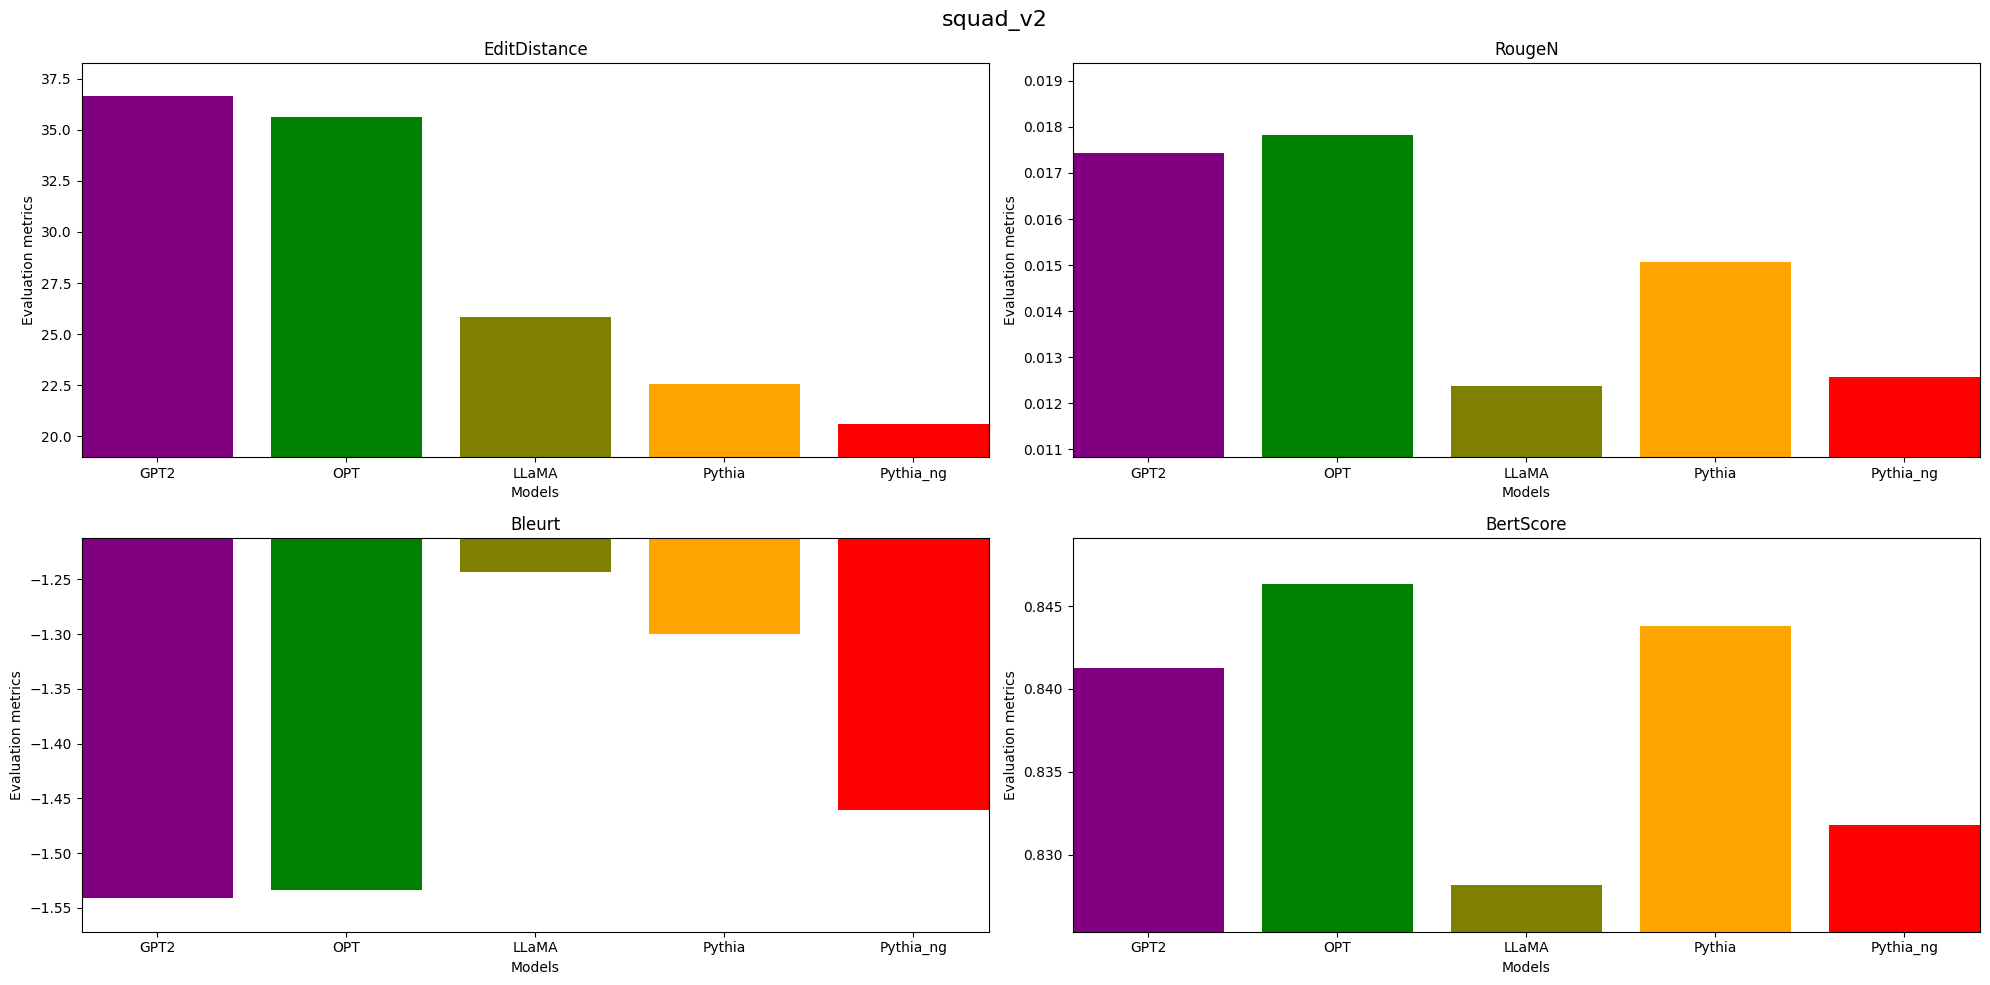

In [ ]:
plot_dataset(squad2, SQUAD_V2, models_dict, metrics_dict, COLORS)

Pythia_ng outperformed in the EditDistance metric, while LLaMA excelled in Bleurt. OPT emerged as the winner in both BertScore and RougeN metrics. However, when considering the average performance across all metrics, Pythia was the overall winner.

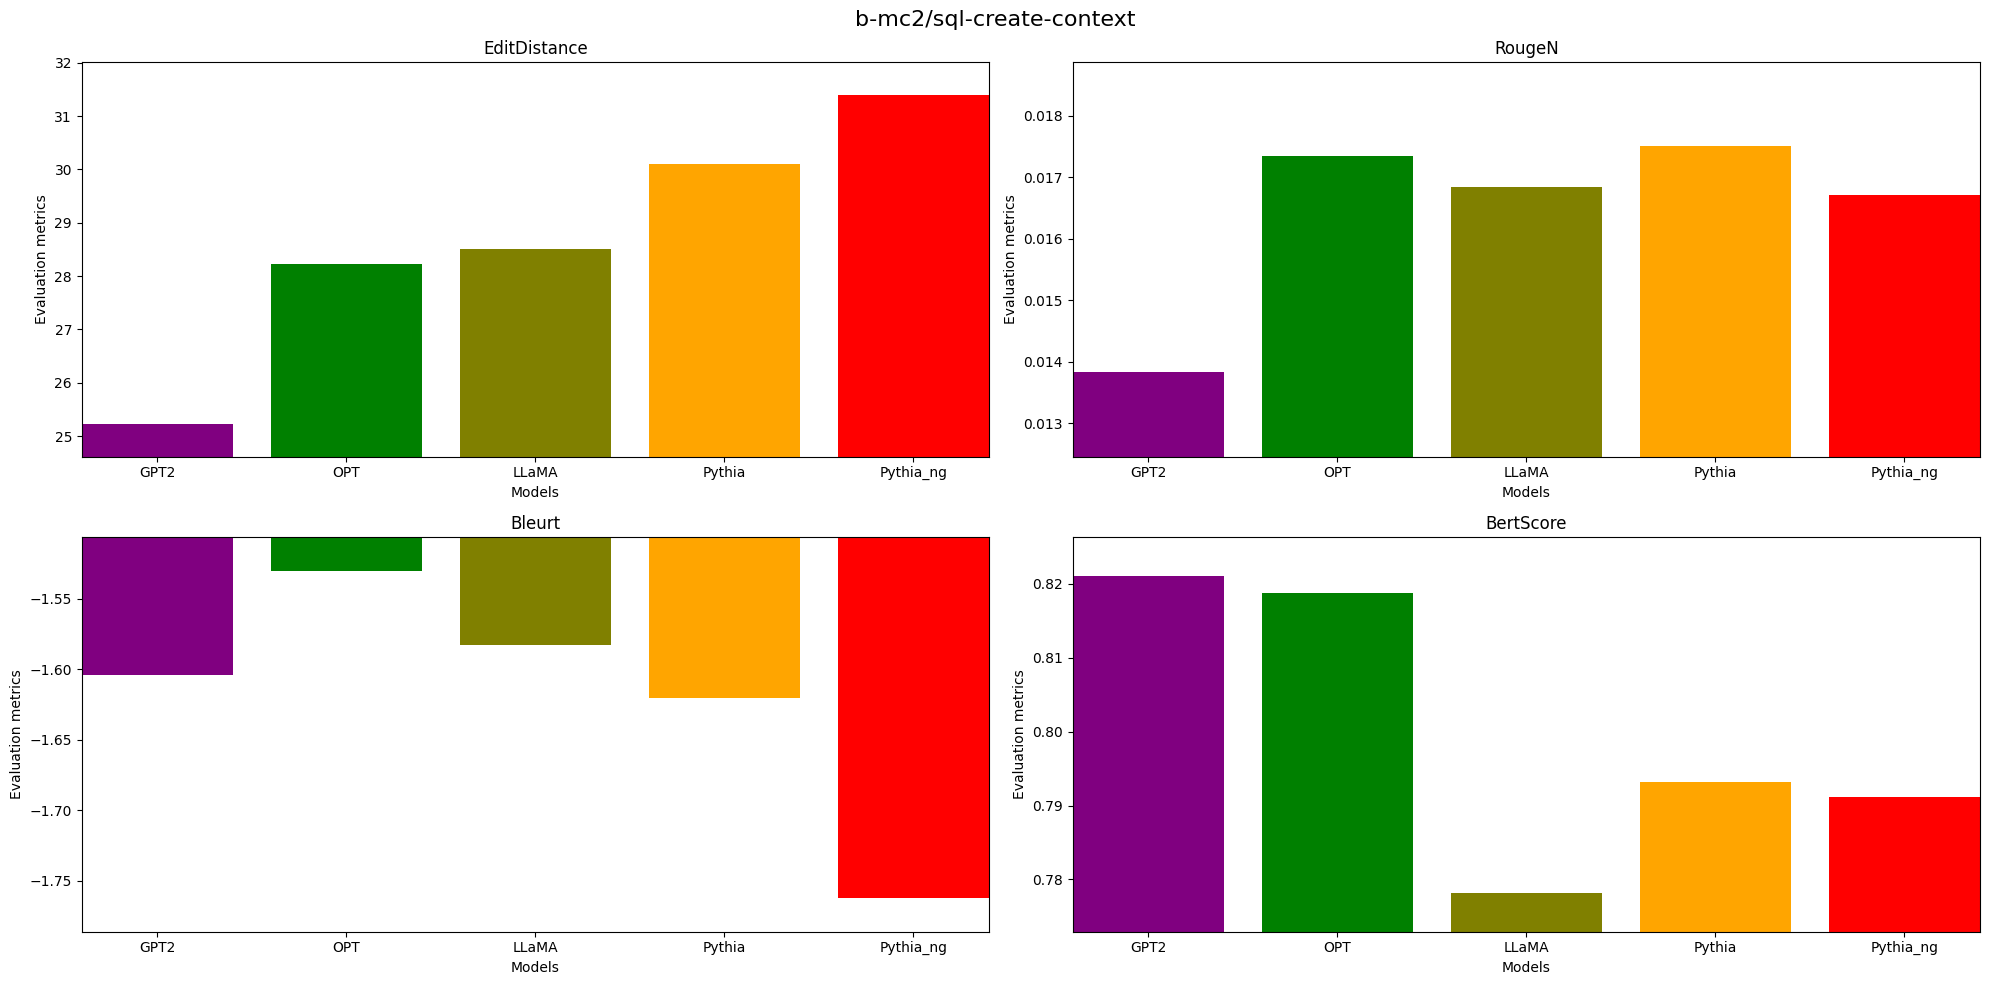

In [ ]:
plot_dataset(sql, SQL_CONTEXT, models_dict, metrics_dict, COLORS)

GPT2 led in the EditDistance and BertScore metrics, while OPT excelled in Bleurt, and Pythia won in RougeN. However, when considering the average performance across all metrics, GPT2 emerged as the overall winner.

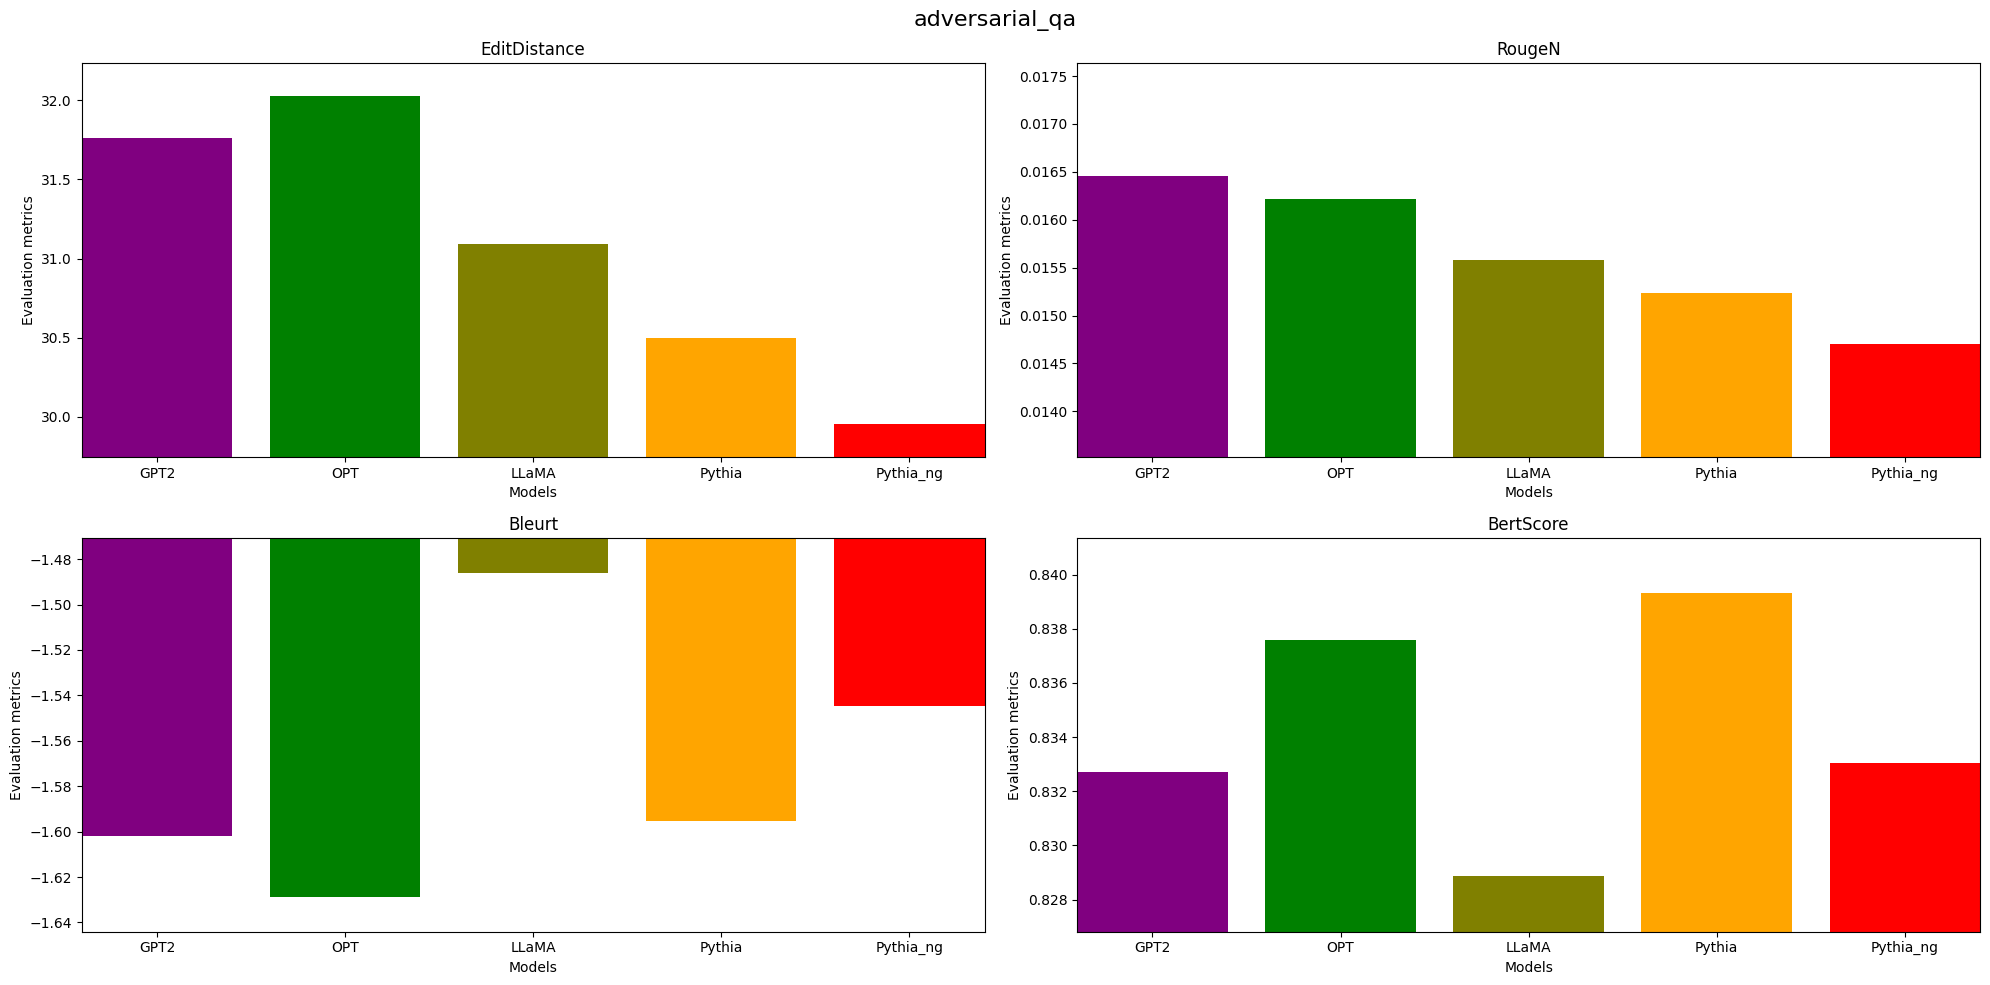

In [ ]:
plot_dataset(adversarial_qa, ADVERSARIAL_QA, models_dict, metrics_dict, COLORS)

Pythia_ng led in the EditDistance metric, LLaMA excelled in Bleurt, GPT2 won in RougeN, and Pythia was the best in BertScore. However, it’s important to note that despite some models showing better results in certain metrics, the scores across all metrics are so close to each other that it could be concluded that the models essentially have equivalent performance.

Upon evaluating the three plots, it is evident that all models: GPT2, OPT, LLaMA, Pythia, and Pythia_ng, exhibit similar performance across the metrics. Therefore, it’s not a scenario of one winner and others as losers.